In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("avg_deaths.csv")

In [3]:
dataset

,Month,New_deaths
0,1,0
1,2,0
2,3,77
3,4,1844
4,5,1448
5,6,785
6,7,769
7,8,1020
8,9,739
9,10,751


In [5]:
strt = 0
end = 3
deaths = []

for i in range(4):
    death_cumulative = dataset["New_deaths"][strt:end].sum()
    deaths.append(death_cumulative)
    strt += 3
    end += 3

In [6]:
deaths

[77, 4077, 2528, 4223]

In [7]:
strt = 0
end = 3
deaths = []

for i in range(4):
    death_cumulative = dataset["New_deaths"][strt:end].sum()
    deaths.append(death_cumulative)
    end += 3

In [8]:
deaths

[77, 4154, 6682, 10905]

In [9]:
proportions = [round(death/max(deaths), 2) for death in deaths]
proportions

[0.01, 0.38, 0.61, 1.0]

In [10]:
xmax_vals = [(0.5 + proportion * 0.3) for proportion in proportions]
xmax_vals

[0.503, 0.614, 0.683, 0.8]

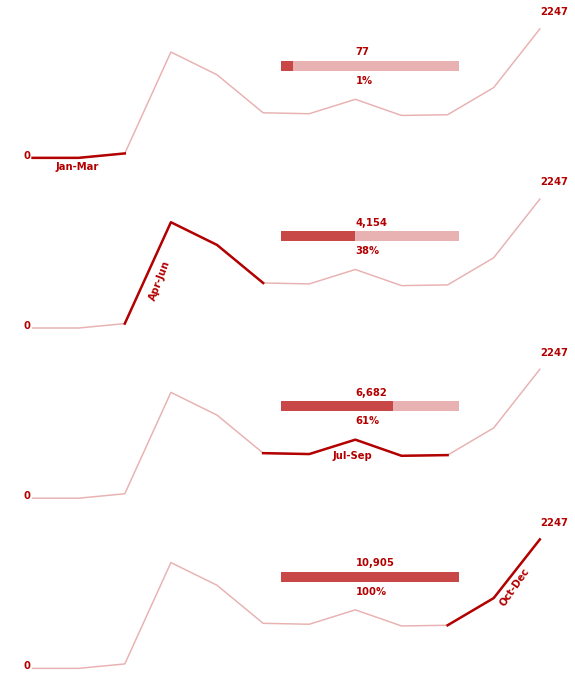

In [14]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(10,12))
axis=ax1,ax2,ax3,ax4
for ax in axis:
    ax.plot(dataset["Month"],dataset["New_deaths"],color="#b30000",alpha=0.3)
    ax.set_xticks([])
    ax.set_yticks([])
    for location in ("top","bottom","left","right"):
        ax.spines[location].set_visible(False)
    ax.text(0.8,0,"0",color="#b30000",weight="bold")
    ax.text(12,2500,"2247",color="#b30000",weight="bold")
    
ax1.plot(dataset["Month"][:3],dataset["New_deaths"][:3],color="#b30000",linewidth=2.5)
ax2.plot(dataset["Month"][2:6],dataset["New_deaths"][2:6],color="#b30000",linewidth=2.5)
ax3.plot(dataset["Month"][5:10],dataset["New_deaths"][5:10],color="#b30000",linewidth=2.5)
ax4.plot(dataset["Month"][9:],dataset["New_deaths"][9:],color="#b30000",linewidth=2.5)

ax1.text(1.5,-200,"Jan-Mar",color="#b30000",weight="bold")
ax2.text(3.5,500,"Apr-Jun",color="#b30000",weight="bold",rotation=69)
ax3.text(7.5,700,"Jul-Sep",color="#b30000",weight="bold")
ax4.text(11.1,1100,"Oct-Dec",color="#b30000",weight="bold",rotation=55)
   
for ax,proportion,death,xmax in zip(axis,proportions,deaths,xmax_vals):
    ax.axhline(y=1600,xmin=0.5,xmax=0.8,color="#b30000",linewidth=10,alpha=0.3)
    ax.axhline(y=1600,xmin=0.5,xmax=xmax,color="#b30000",linewidth=10,alpha=0.6)
    
    ax.text(8,1800,format(death,","),color="#b30000",weight="bold")
    ax.text(8,1300,str(int(proportion*100))+"%",color="#b30000",weight="bold")
plt.savefig   
plt.show()    